In [3]:
import os
import numpy as np
from one.api import ONE
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import brainbox.behavior.wheel as wh
from scipy.stats import zscore
import concurrent.futures

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial//2_fit_models/'
#functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from preprocessing_functions import idxs_from_files_pre_custom_qc, idxs_from_files, prepro_design_matrix, concatenate_sessions

one = ONE(mode="remote")

## Parameters

In [4]:
bin_size = 0.1
# bin_size = 0.02

# Plotting params
multiplier = 1/bin_size

event_type_list = ['goCueTrigger_times']  # , 'feedback_times', 'firstMovement_times'
event_type_name = ['Go cue']  # , 'Feedback time', 'First movement onset'


In [5]:

data_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Design matrix/' + 'v4_9Dec2024/' + str(bin_size) + '/'

os.chdir(data_path)
design_matrices = os.listdir(data_path)
var_names = ['avg_wheel_vel', 'whisker_me', 'Lick count']
       
idxs, mouse_names = idxs_from_files(design_matrices, bin_size)

# Design matrix analyses

To transform Poisson data into a Gaussian (normal) distribution, you can use a square root transformation or the Anscombe transformation. These transformations are common methods used to approximate a normal distribution from Poisson data.
- Square Root Transformation: The square root transformation is a simple method to stabilize the variance of Poisson data and make it more approximately Gaussian. For each data point x, you take the square root of x:

- Anscombe Transformation: The Anscombe transformation is a more sophisticated transformation that stabilizes the variance and approximates the normal distribution for Poisson data. It is defined as:

### Covariance matrix

In [6]:
def plot_cov_matrix(design_matrix, var_names):
    cov_df = design_matrix[var_names].dropna().drop_duplicates()
    cov = cov_df.corr()
    f = plt.figure(figsize=(4, 3))
    plt.xticks(range(len(cov_df.keys())), cov_df.columns, fontsize=9, rotation=45)
    plt.yticks(range(len(cov_df.keys())), cov_df.columns, fontsize=9)
    plt.title('Correlation Matrix', fontsize=12)

    matrix = np.triu(cov)

    sns.heatmap(cov,
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        vmin=-1.0, vmax=1.0,
        square=True, annot=True, mask=matrix)
    
def plot_raw_traces(design_matrix, var_names, start_point):

    end_point = start_point + 300

    for k, key in enumerate(var_names):
        
        use_data = design_matrix.loc[(design_matrix['Bin'] > start_point) & (design_matrix['Bin'] < end_point)]
        plt.plot(use_data['Bin'], use_data[key])
        plt.xlim([start_point, end_point])
        # plt.vlines((use_data['Onset times'].unique() *10), np.min(use_data[key]), np.max(use_data[key]), color='gray', linestyles='--')
        plt.xlabel('Bin (100 ms)')
        plt.title(key)
        plt.show()

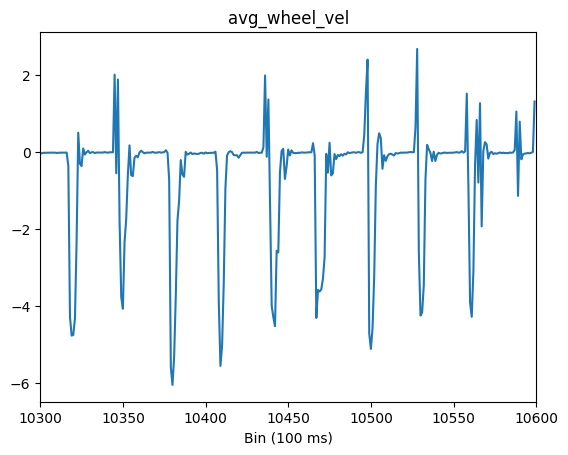

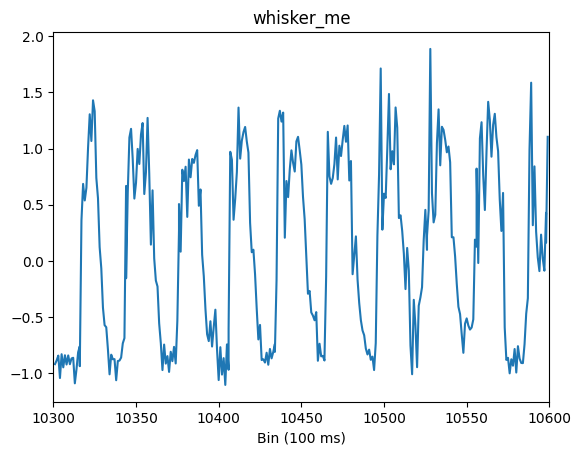

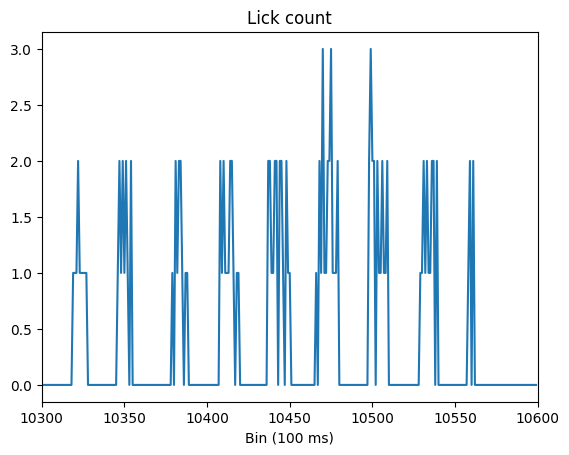

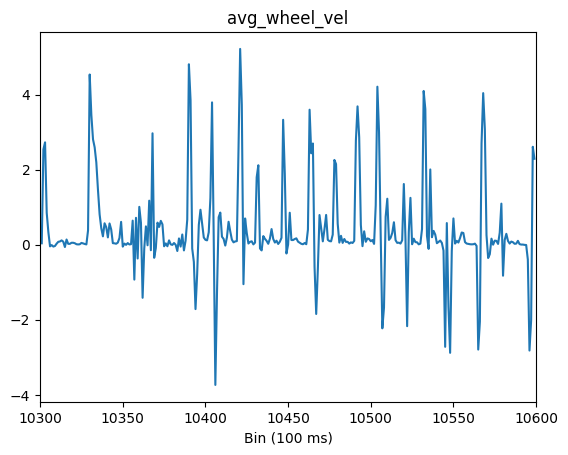

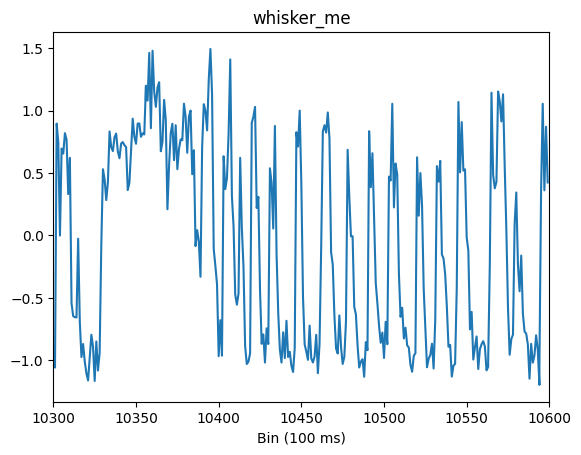

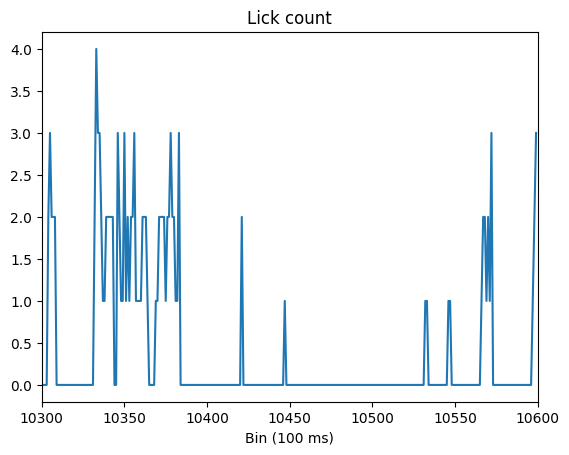

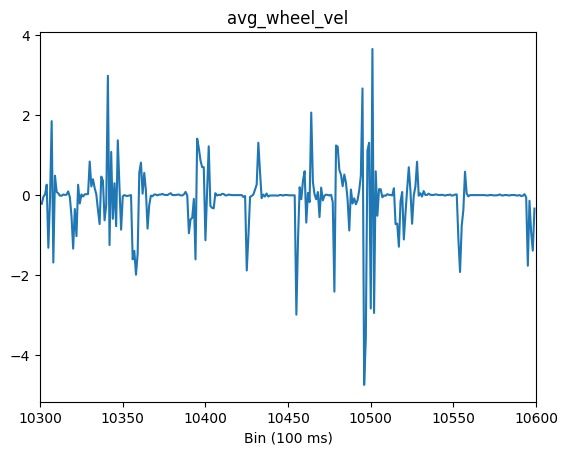

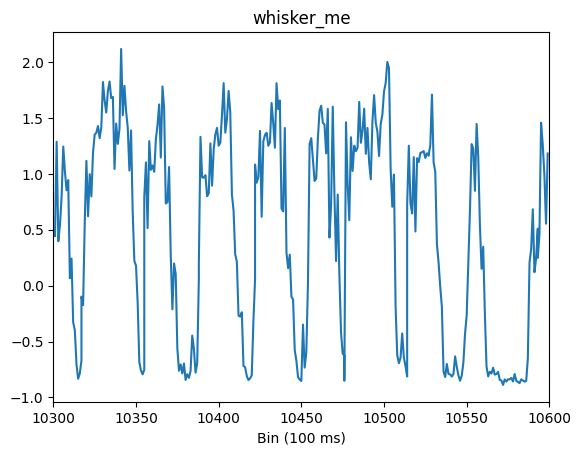

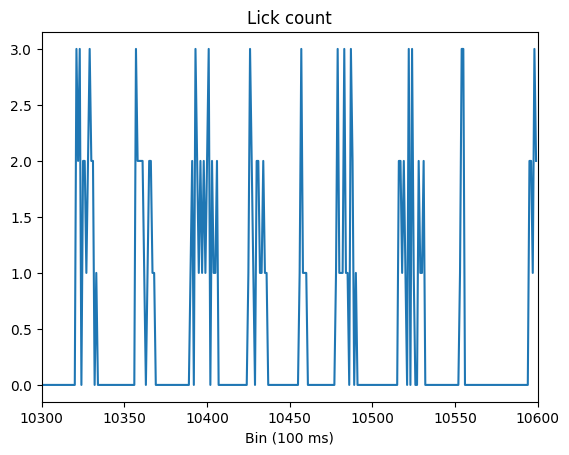

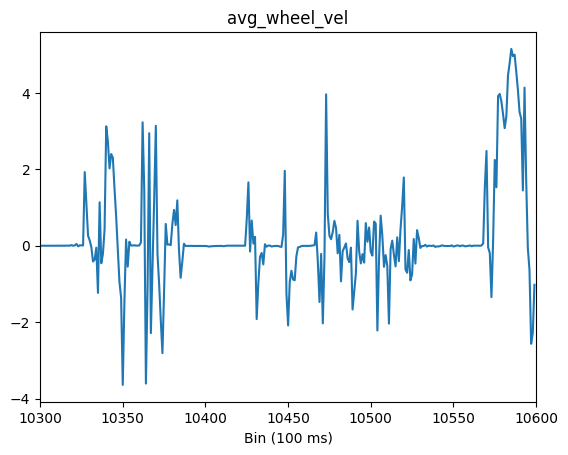

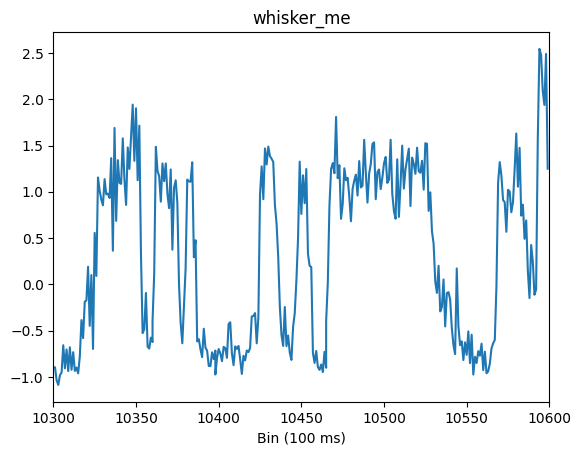

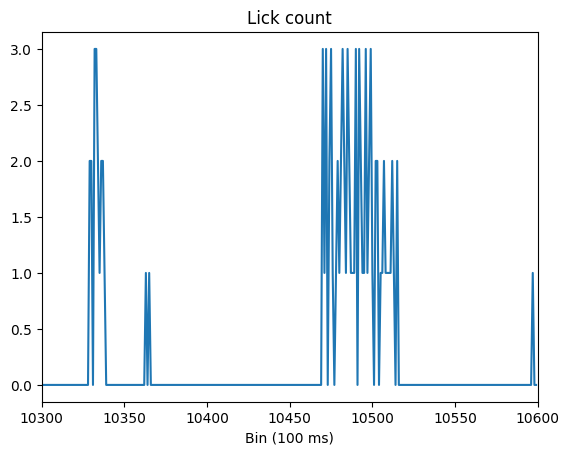

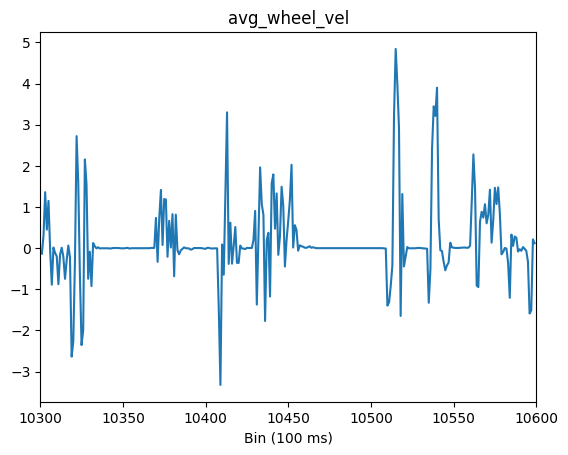

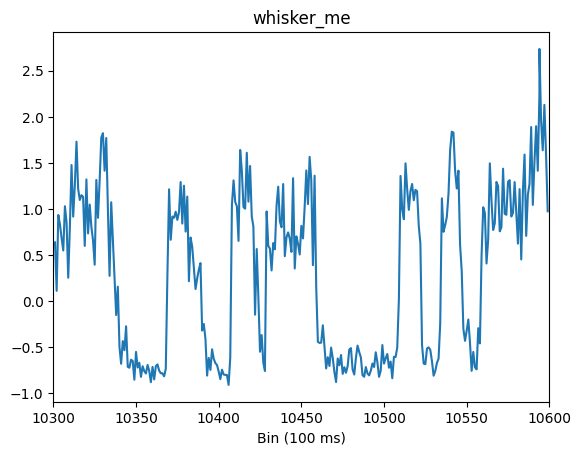

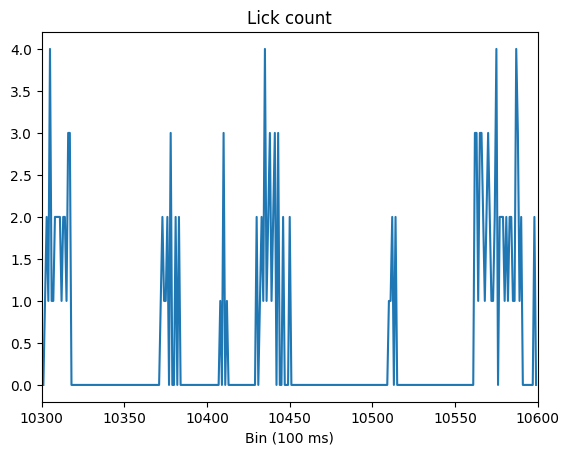

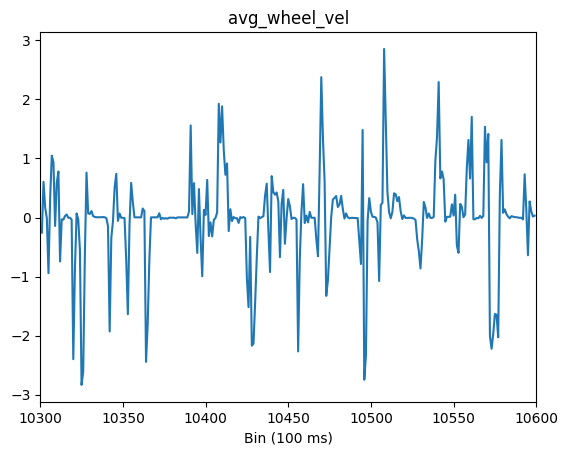

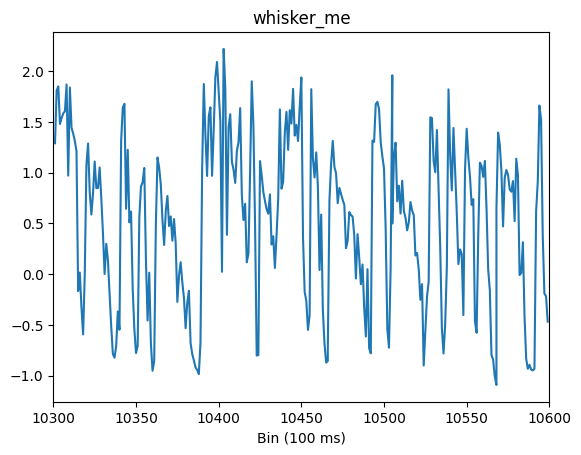

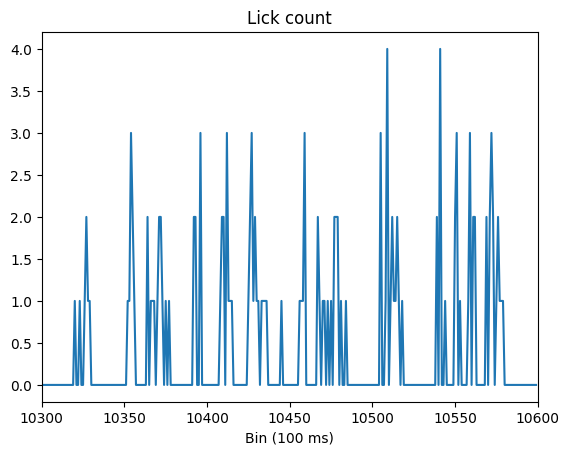

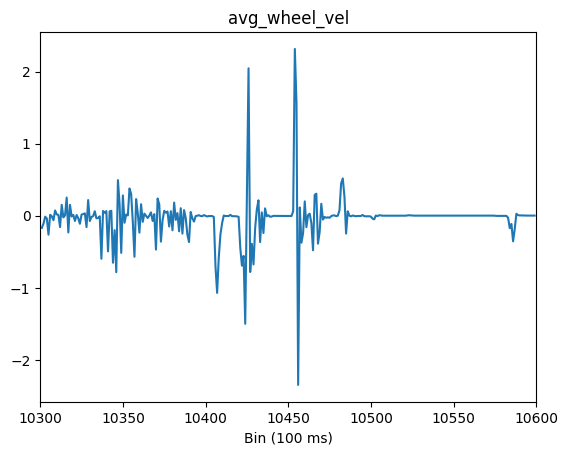

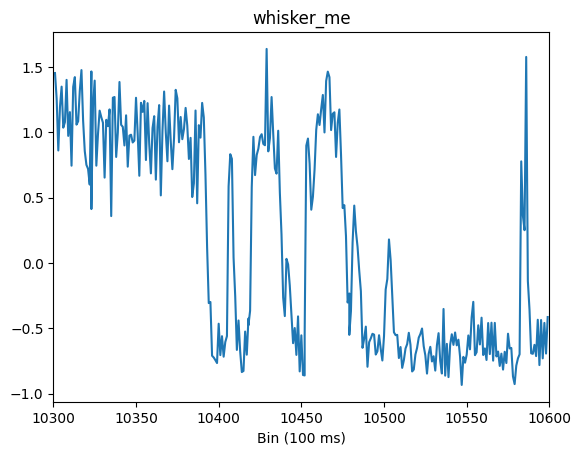

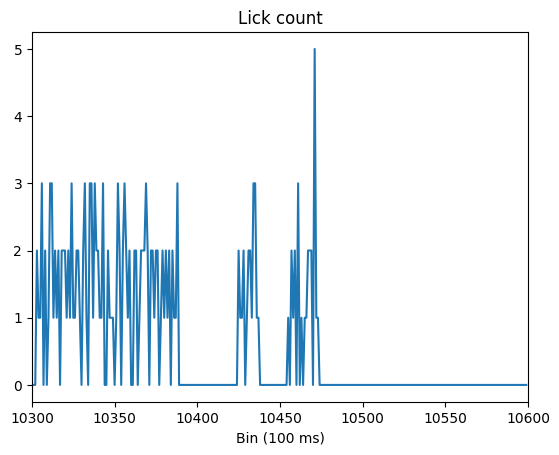

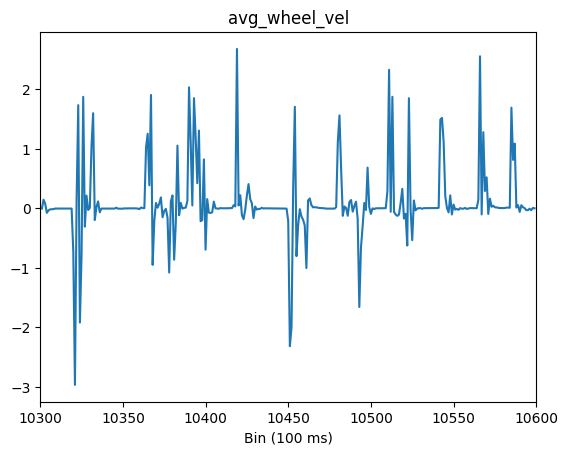

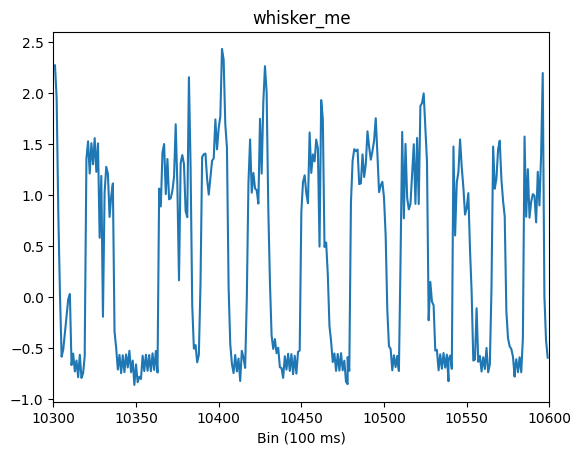

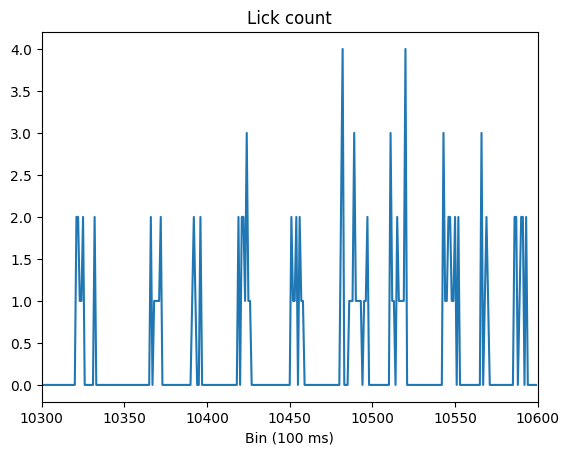

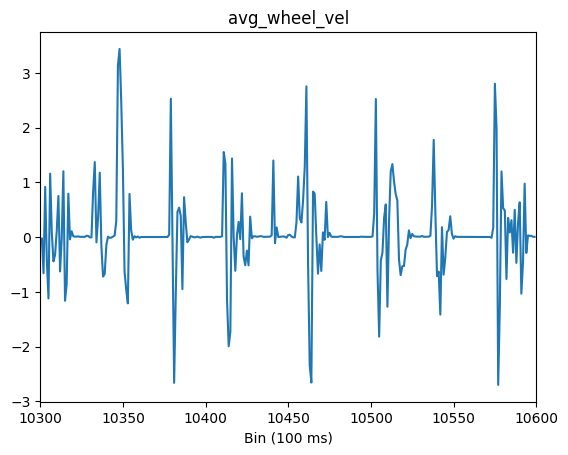

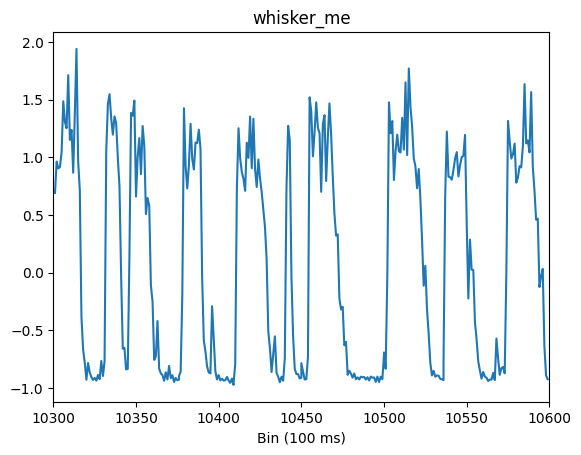

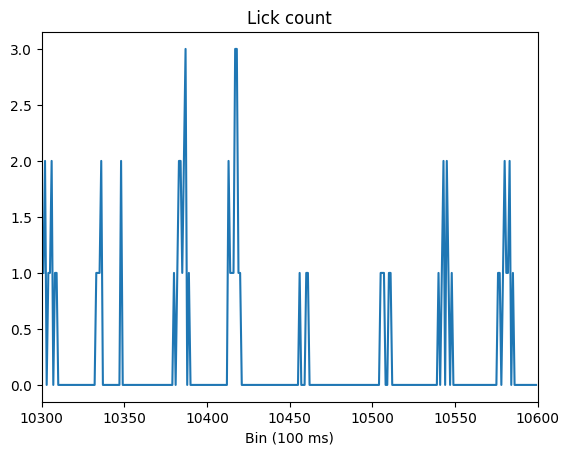

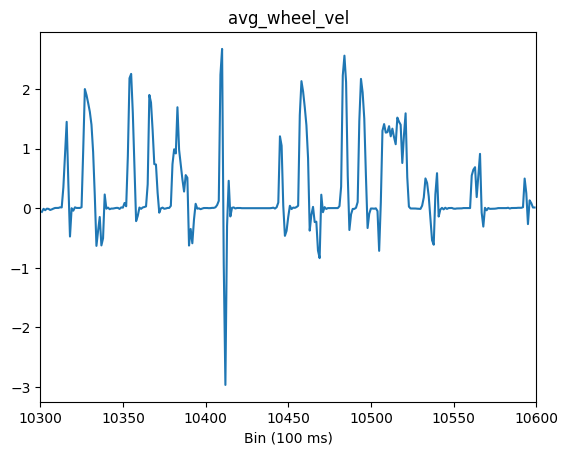

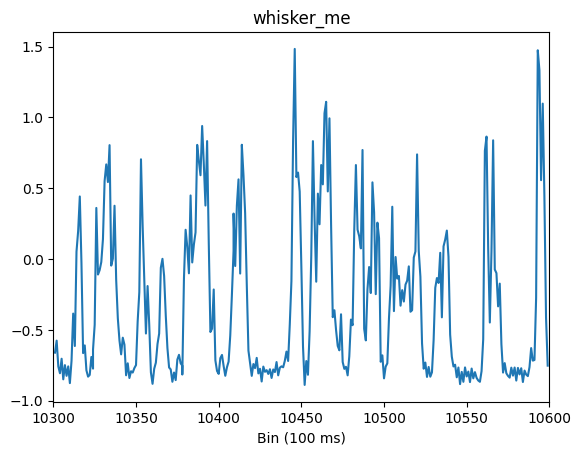

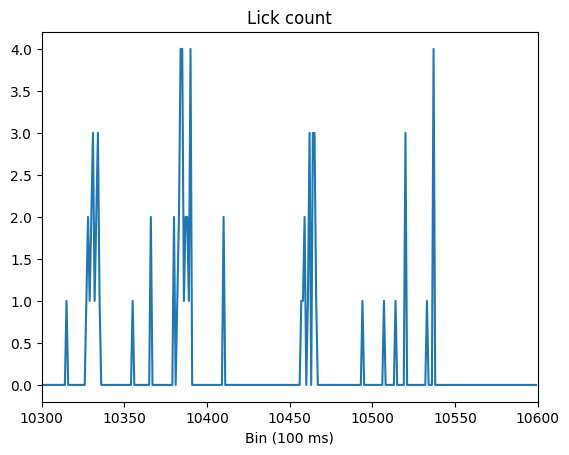

In [26]:
# Load design matrix

for f, idx in enumerate(idxs[0:10]):
    file = 'design_matrix_' + str(idx) + '_' + str(bin_size) 

    design_matrix = pickle.load(open(file, "rb"))
    # plot_cov_matrix(design_matrix, var_names)
    plot_raw_traces(design_matrix, var_names, start_point=10300)

In [29]:
# Load preprocessed data
prepro_results_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Results/' + str(bin_size) + '/'
os.chdir(prepro_results_path)
idxs, mouse_names, matrix_all, matrix_all_unnorm, session_all = pickle.load(open(prepro_results_path + "preprocessed_data_v4_171224_alltrials", "rb"))


### Processed matrix

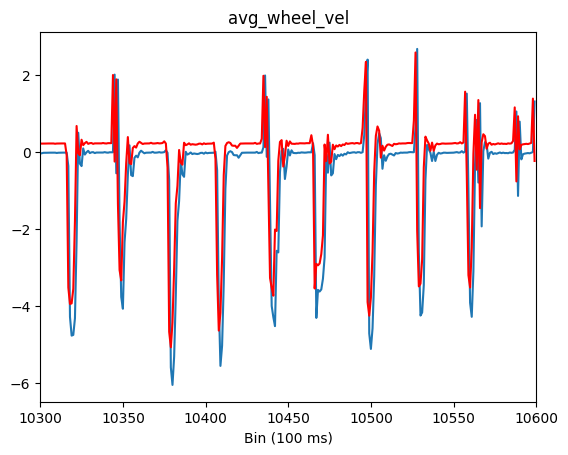

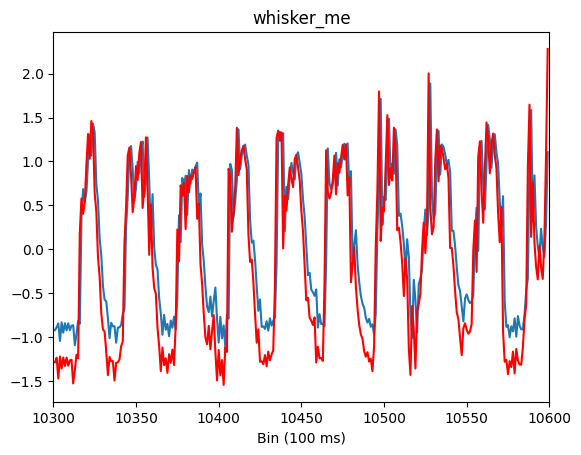

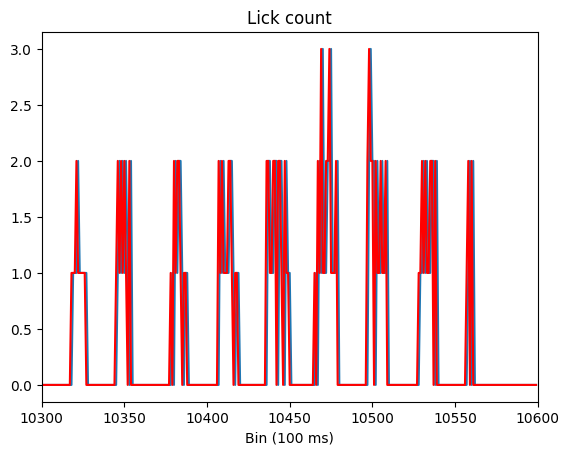

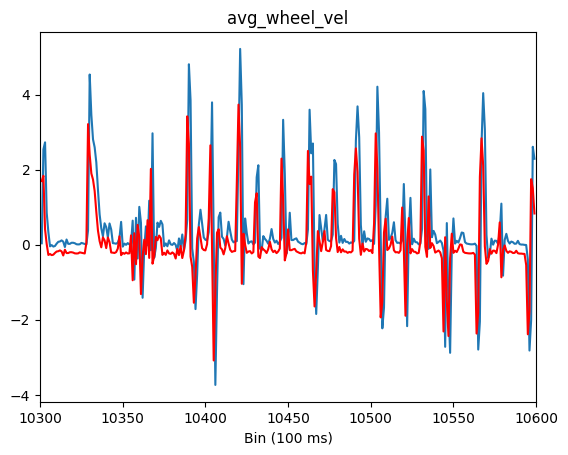

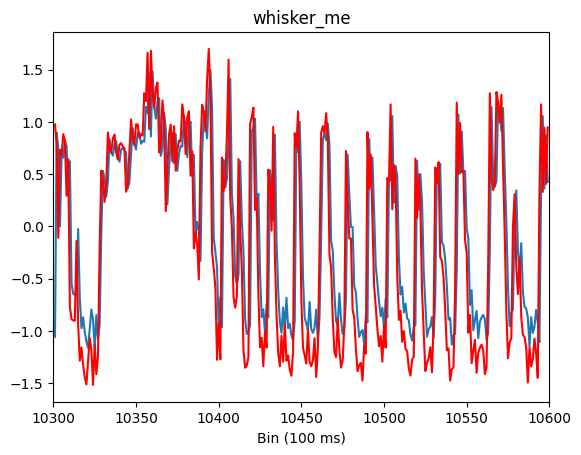

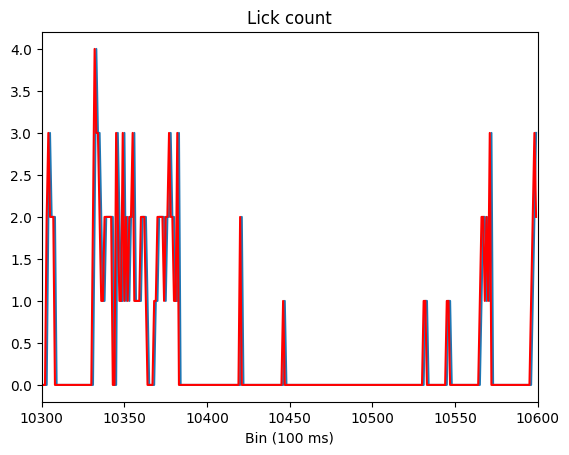

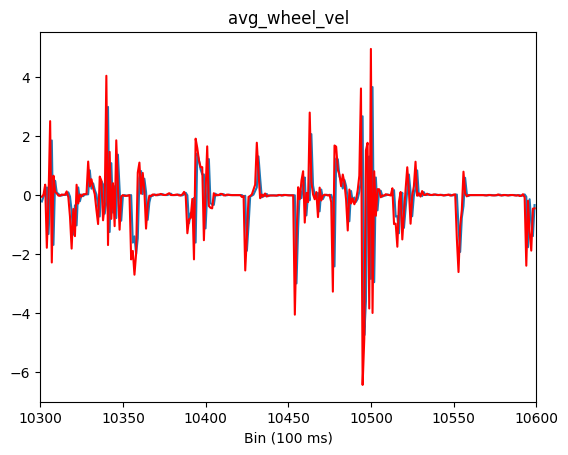

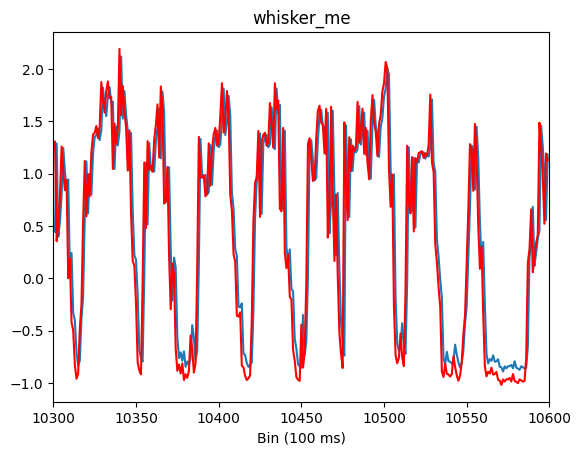

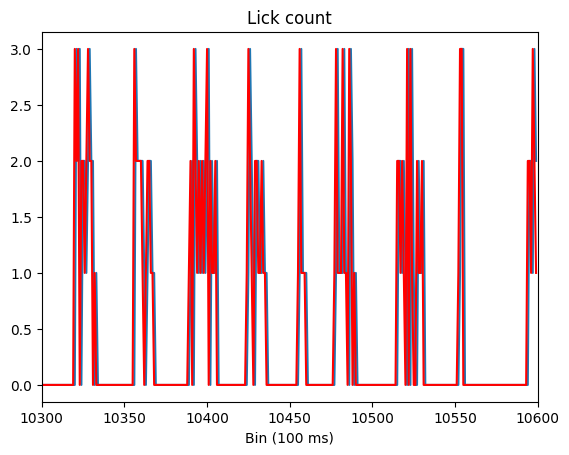

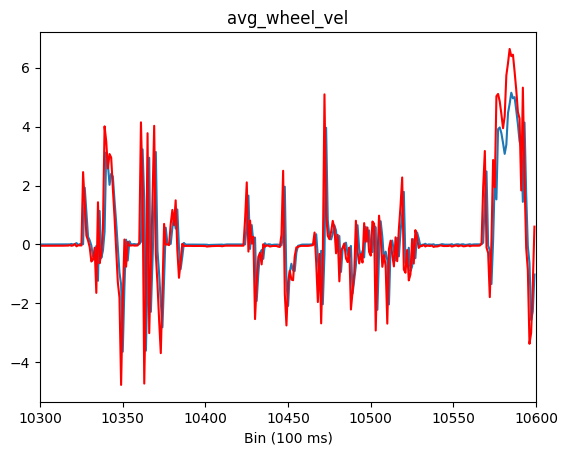

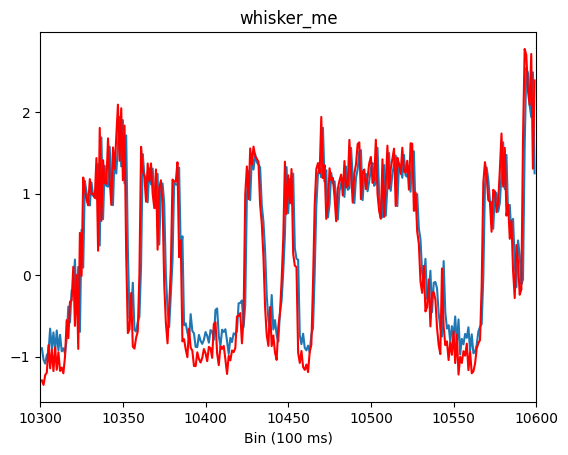

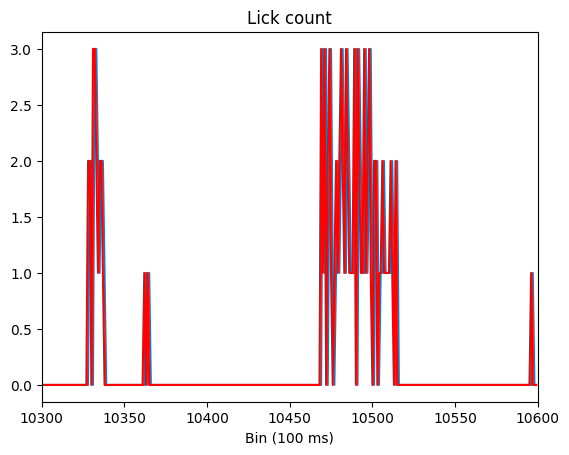

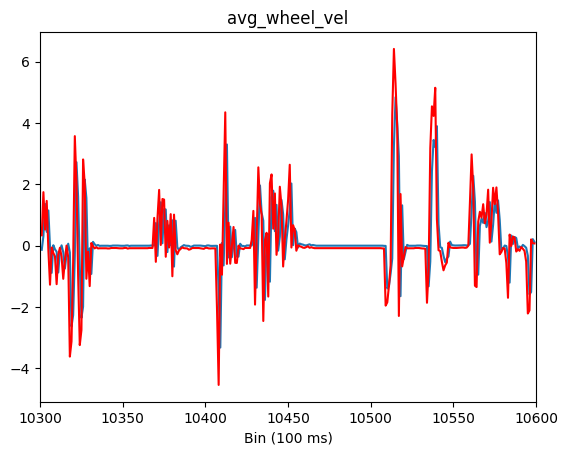

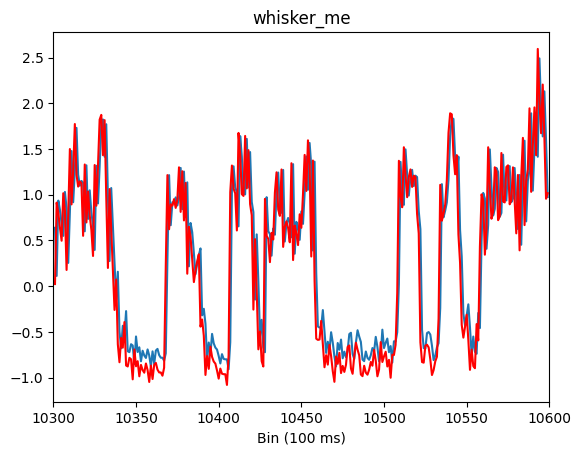

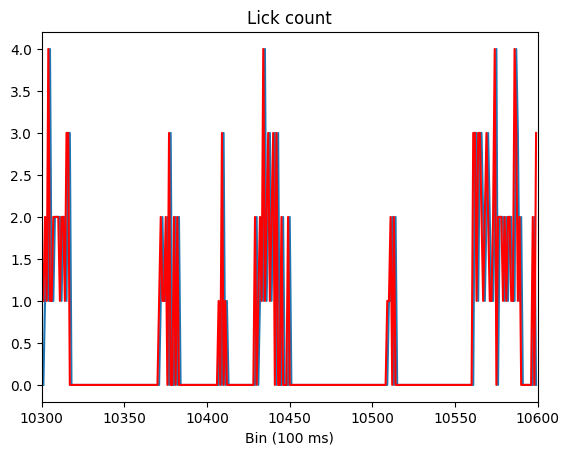

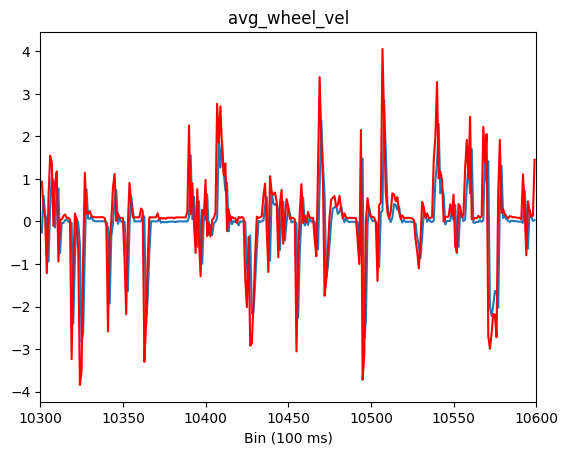

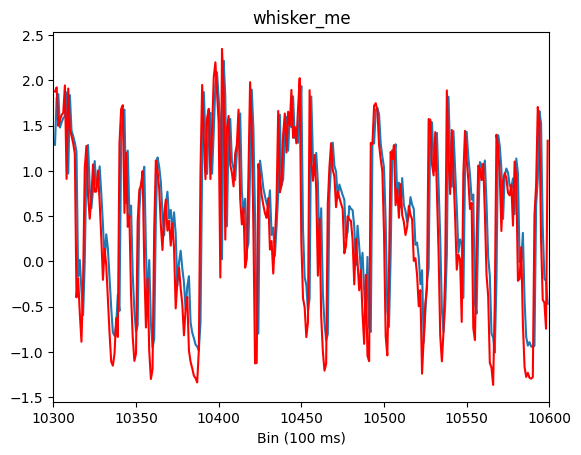

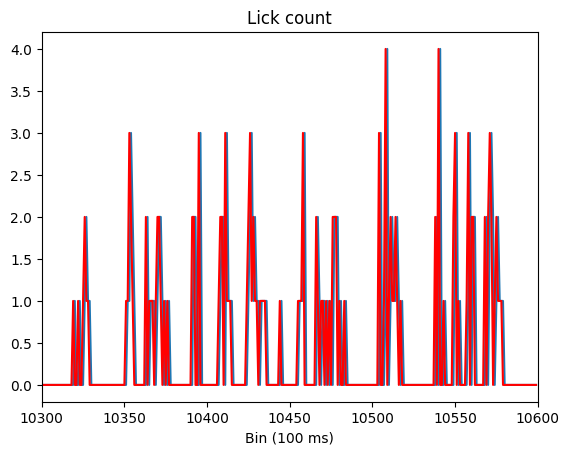

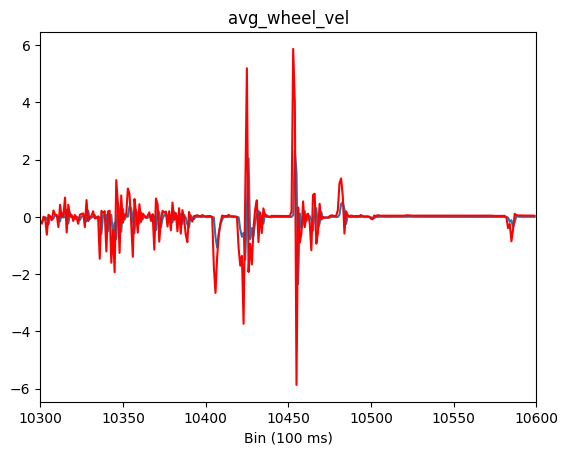

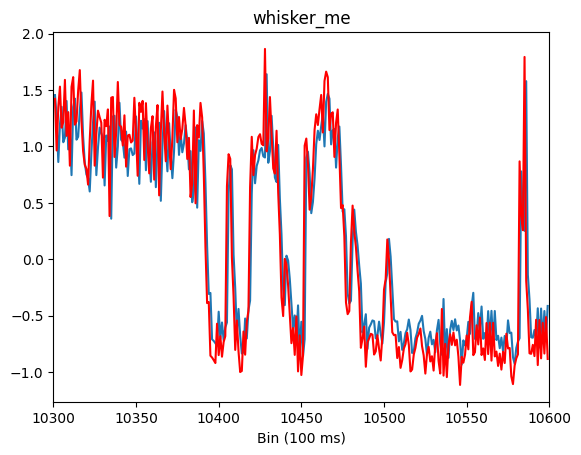

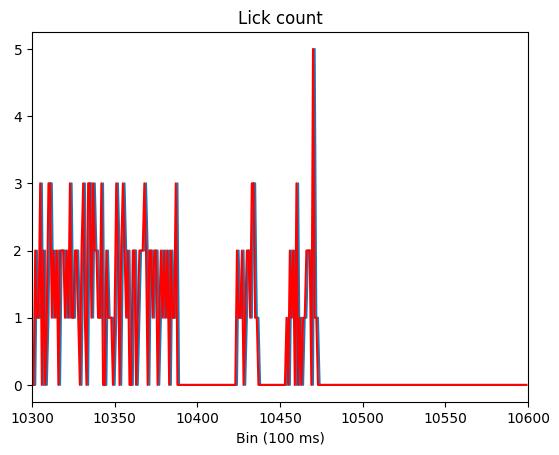

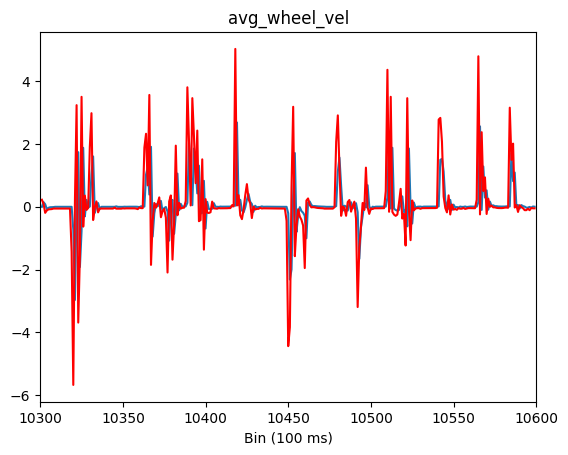

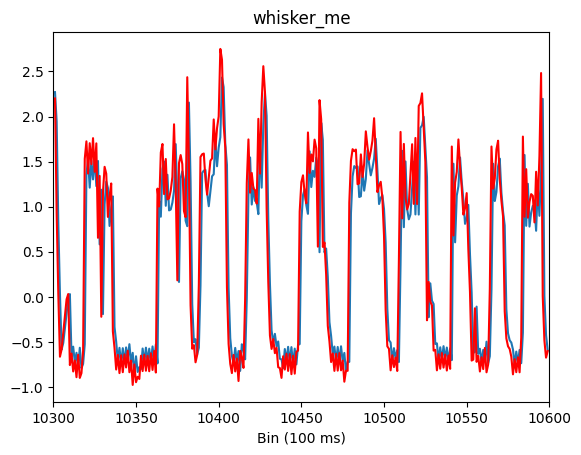

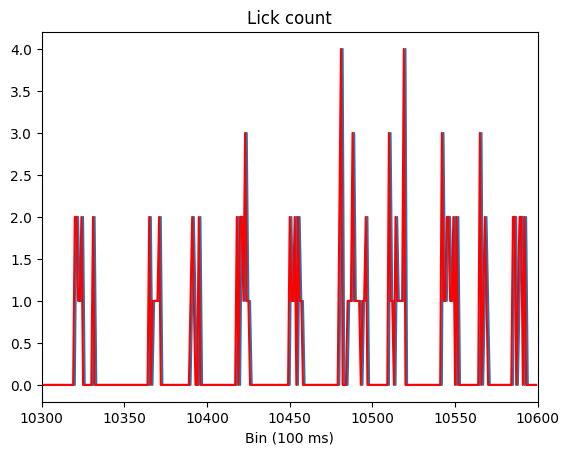

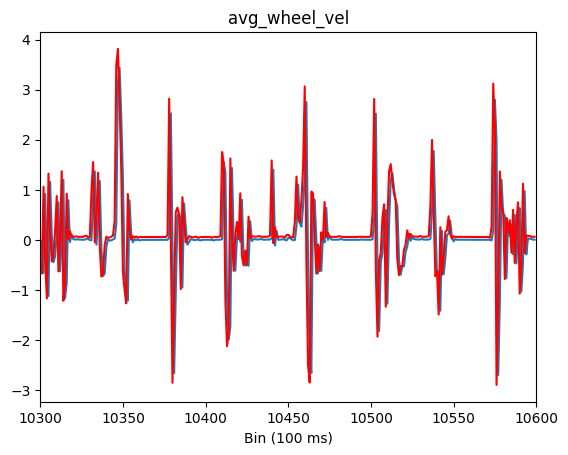

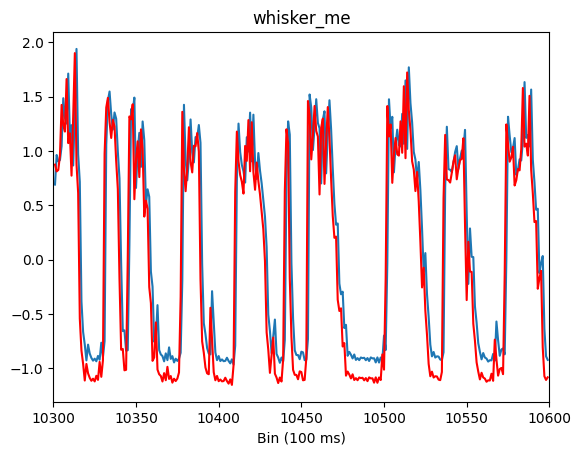

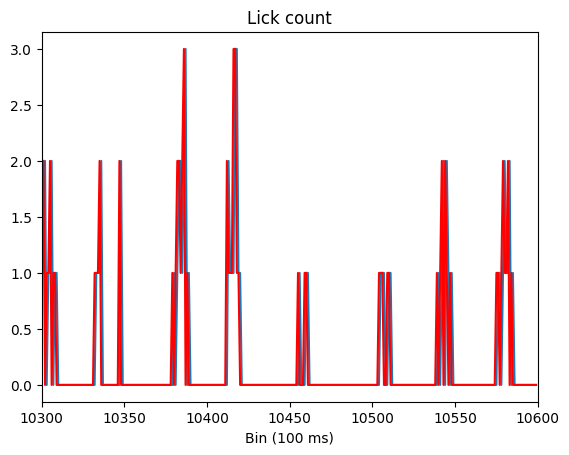

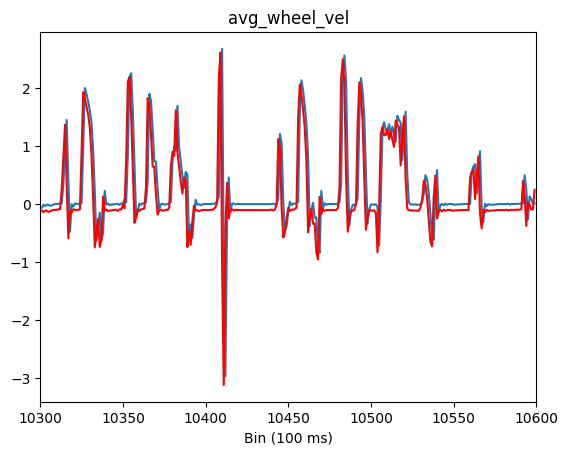

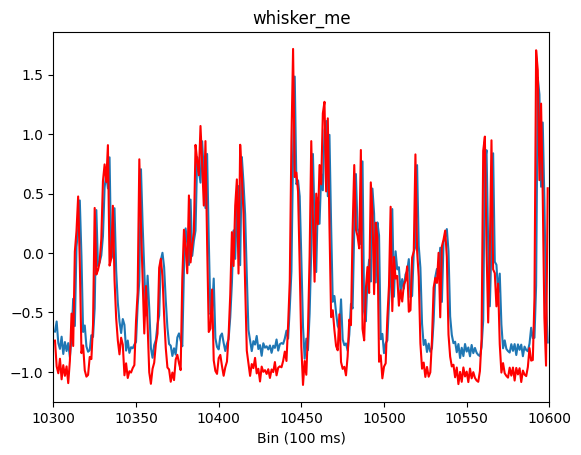

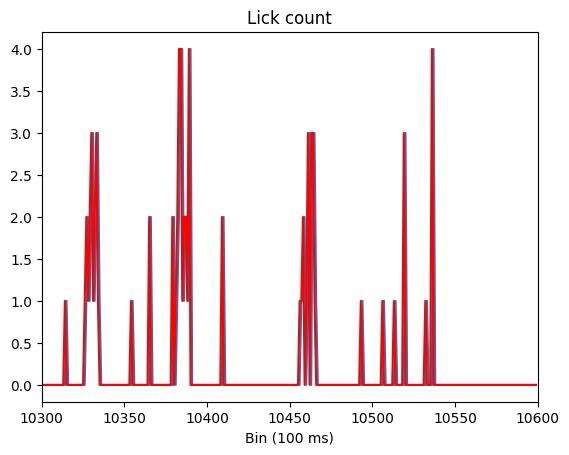

In [33]:
for f, idx in enumerate(idxs[0:10]):
    file = 'design_matrix_' + str(idx) + '_' + str(bin_size) 
    session = idx[:36]
    mouse_name = idx[37:]
    unnorm_mat = matrix_all_unnorm[mouse_name][session]
    design_matrix = matrix_all[mouse_name][session]
    
    design_matrix_heading = pd.DataFrame(columns=var_names)
    design_matrix_heading[var_names] = design_matrix.copy()  # TODO: need to understand why number is the same and whether it depends on lag
    bins = unnorm_mat['Bin']
    design_matrix_heading['Bin'] = bins
        
    start_point = 10300    
    end_point = start_point + 300

    for k, key in enumerate(var_names):
        
        use_data = unnorm_mat.loc[(unnorm_mat['Bin'] > start_point) & (unnorm_mat['Bin'] < end_point)]
        plt.plot(use_data['Bin'], use_data[key])
        use_data = design_matrix_heading.loc[(design_matrix_heading['Bin'] > start_point) & 
                                             (design_matrix_heading['Bin'] < end_point)]
        plt.plot(use_data['Bin'], use_data[key], color='red')
        plt.xlim([start_point, end_point])
        # plt.vlines((use_data['Onset times'].unique() *10), np.min(use_data[key]), np.max(use_data[key]), color='gray', linestyles='--')
        plt.xlabel('Bin (100 ms)')
        plt.title(key)
        plt.show()

(array([4.738e+03, 3.420e+03, 3.444e+03, 3.259e+03, 4.042e+03, 3.475e+03,
        9.240e+02, 1.440e+02, 2.500e+01, 3.000e+00]),
 array([-1.22192525, -0.76645394, -0.31098263,  0.14448867,  0.59995998,
         1.05543128,  1.51090259,  1.9663739 ,  2.4218452 ,  2.87731651,
         3.33278782]),
 <BarContainer object of 10 artists>)

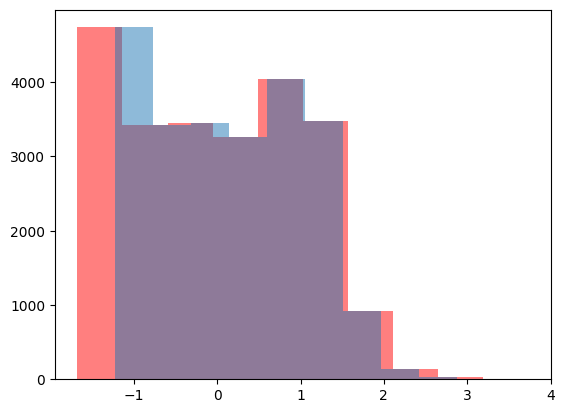

In [14]:
plt.hist(zscore(clean_df['whisker_me']), alpha=0.5, color='red')
plt.hist(clean_df['whisker_me'], alpha=0.5)

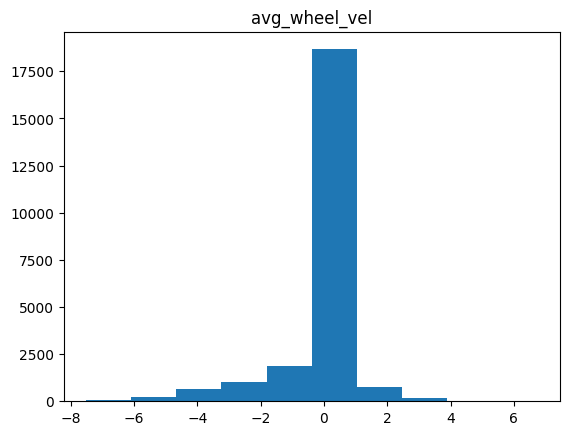

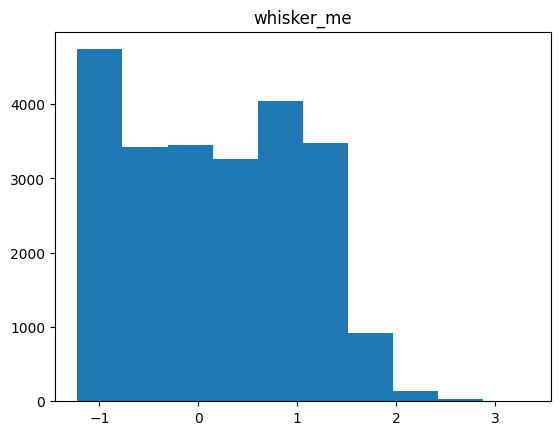

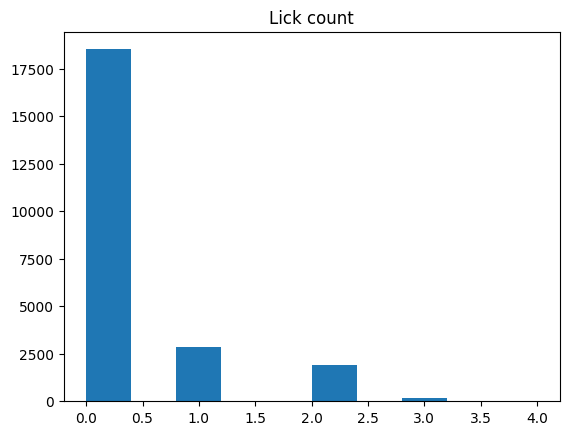

In [15]:

for k, key in enumerate(var_names):
    
    plt.hist(clean_df[key])
    plt.title(key)
    plt.show()
